## 8.9　データ準備 2


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [6]:
data_root = './data'
train_set0 = datasets.MNIST(root=data_root, train=True, download=True)

In [7]:
!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Mar  6 07:21 raw

./data/MNIST/raw:
total 65012
-rw-r--r-- 1 root root  7840016 Mar  6 07:21 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Mar  6 07:21 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Mar  6 07:21 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Mar  6 07:21 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Mar  6 07:21 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Mar  6 07:21 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Mar  6 07:21 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Mar  6 07:21 train-labels-idx1-ubyte.gz


In [8]:
print('データ件数: ', len(train_set0))
image, label = train_set0[0]
print('入力データの型: ', type(image))
print('正解データの方: ', type(label))


データ件数:  60000
入力データの型:  <class 'PIL.Image.Image'>
正解データの方:  <class 'int'>


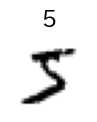

In [9]:
plt.figure(figsize=(1, 1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

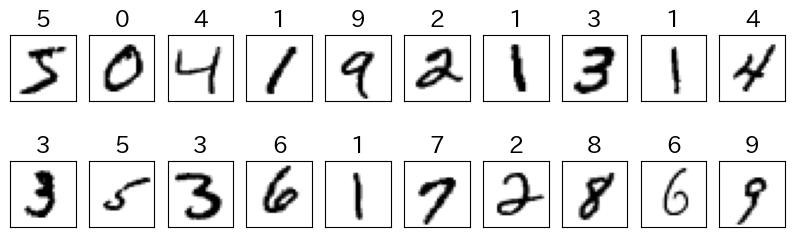

In [10]:
plt.figure(figsize=(10, 3))
for i in range(20):
  ax = plt.subplot(2, 10, i+1)

  image, label = train_set0[i]

  plt.imshow(image, cmap='gray_r')
  ax.set_title(f'{label}')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
transform1 = transforms.Compose([transforms.ToTensor(),])
train_set1 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform1)

In [12]:
image, label = train_set1[0]
print('入力データの型: ', type(image))
print('入力データのshape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

入力データの型:  <class 'torch.Tensor'>
入力データのshape:  torch.Size([1, 28, 28])
最小値:  tensor(0.)
最大値:  tensor(1.)


In [13]:
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5),])
train_set2 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform2)

In [14]:
image, label = train_set2[0]
print('shape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

shape:  torch.Size([1, 28, 28])
最小値:  tensor(-1.)
最大値:  tensor(1.)


In [15]:
transform3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
    ])

train_set3 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform3)

In [16]:
image, label = train_set3[0]
print('shape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

shape:  torch.Size([784])
最小値:  tensor(-1.)
最大値:  tensor(1.)


In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_set = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)